<a href="https://colab.research.google.com/github/ShahadFh/ShahadAlhmoud/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [26]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 202MB/s]


## Importing Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**bold text**## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 1375 to 147969
Columns: 27280 entries, Busbreakdown_ID to Breakdown_or_Running_Late_Running Late
dtypes: bool(27278), int64(2)
memory usage: 130.8 MB
None
       Busbreakdown_ID  Number_Of_Students_On_The_Bus
count     5.024000e+03                    5024.000000
mean      1.296014e+06                       3.692078
std       3.699670e+04                      80.795469
min       1.213115e+06                       0.000000
25%       1.262852e+06                       0.000000
50%       1.287577e+06                       2.000000
75%       1.331539e+06                       4.000000
max       1.362524e+06                    5718.000000


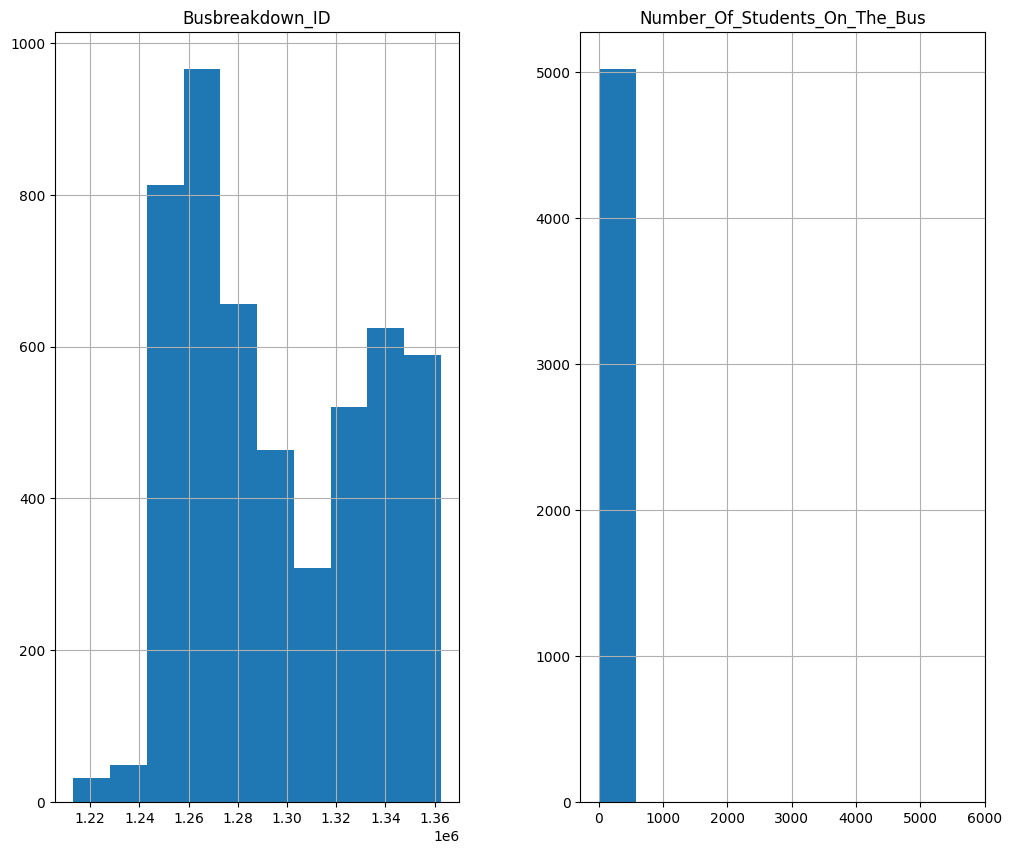

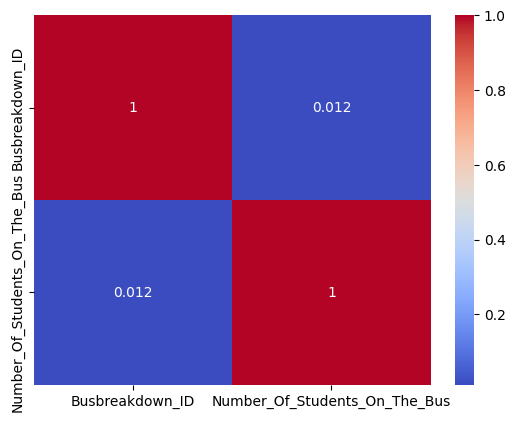

In [66]:

print(df.info())

print(df.describe())


df.hist(figsize=(12, 10))
plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


for col in categorical_columns:
    sns.countplot(data=df, x=col)
    plt.show()


corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [43]:
df.isnull()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus,School_Year_2016-2017,School_Year_2017-2018,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Project Read AM Run,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,...,Last_Updated_On_12/23/2016 02:28:15 PM,Last_Updated_On_12/23/2016 02:28:32 PM,Last_Updated_On_12/23/2016 09:08:10 AM,Last_Updated_On_12/23/2016 09:08:52 AM,Last_Updated_On_12/23/2016 09:09:17 AM,Last_Updated_On_12/23/2016 09:09:49 AM,Last_Updated_On_12/23/2016 09:10:17 AM,Last_Updated_On_12/27/2016 09:44:53 AM,Last_Updated_On_12/27/2016 09:45:57 AM,Breakdown_or_Running_Late_Running Late
1375,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1842,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


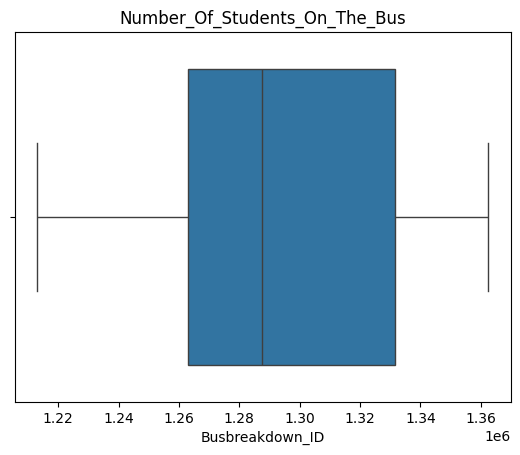

In [83]:
sns.boxplot(x=df['Busbreakdown_ID'])
plt.title('Number_Of_Students_On_The_Bus')
plt.show()

In [62]:
df.head()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus,School_Year_2016-2017,School_Year_2017-2018,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Project Read AM Run,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,...,Last_Updated_On_12/23/2016 02:28:15 PM,Last_Updated_On_12/23/2016 02:28:32 PM,Last_Updated_On_12/23/2016 09:08:10 AM,Last_Updated_On_12/23/2016 09:08:52 AM,Last_Updated_On_12/23/2016 09:09:17 AM,Last_Updated_On_12/23/2016 09:09:49 AM,Last_Updated_On_12/23/2016 09:10:17 AM,Last_Updated_On_12/27/2016 09:44:53 AM,Last_Updated_On_12/27/2016 09:45:57 AM,Breakdown_or_Running_Late_Running Late
1375,1225377,0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1842,1216474,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2587,1226096,5,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3153,1226288,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3367,1213115,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [93]:
encoding_columns = ['Geography',]

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [70]:
X = df.drop('Busbreakdown_ID', axis=1)
y = df['Busbreakdown_ID']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [81]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [94]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 6)                   │         163,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,757 (639.68 KB)

 Trainable params: 163,757 (639.68 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [96]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [97]:
model.evaluate(X_test, y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: